In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
df1 = pd.read_excel('p1.xlsx')
df2 = pd.read_excel('p2.xlsx')

# Define relevant columns
df_columns = ["Source", "Organism", "AMP", "AMO", "CFT", "CFX", "CFL", "CFP", "CFA", "CFO", "CFI", "CFZ", 
              "IME", "AMI", "GEN", "NEO", "ENR", "MAR", "PRA", "DOX", "TET", "NIT", "CHL", "TR/SL"]

# Convert categorical values to numerical (Susceptible=0, Intermediate=1, Resistant=2)
categories = {"S": 0, "I": 1, "*I": 1, "R": 2, "*R": 2}
df1.replace(categories, inplace=True)
df2.replace(categories, inplace=True)

# Drop the "NLA" column if it exists
df1.drop(columns=["NLA"], inplace=True, errors="ignore")
df2.drop(columns=["NLA"], inplace=True, errors="ignore")

# Handle missing values with mode
df1.fillna(df1.mode().iloc[0], inplace=True)
df2.fillna(df2.mode().iloc[0], inplace=True)

# Merge the datasets
df_merged = pd.concat([df1, df2], ignore_index=True)

# Keep only relevant columns
df = df_merged[df_columns]

C:\Users\virgi\AppData\Local\Temp\ipykernel_8072\2401677132.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace(categories, inplace=True)
C:\Users\virgi\AppData\Local\Temp\ipykernel_8072\2401677132.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace(categories, inplace=True)


In [2]:
print(df["Organism"].unique())

['Enterobacter cloacae complex' 'Klebsiella pneumoniae spp pneumoniae'
 'Escherichia coli' 'Staphylococcus aureus'
 'Klibsiella pneumoniae ssp pneumoniae' 'Pseudomonas aeruginosa'
 'Salmonella enterica spp diarizonae' 'Acinetobacter baumanii complex'
 'Klebsiella pneumoniae ssp pneumoniae' 'Enterobacter aerogenes']


In [3]:
df['Organism'] = df['Organism'].replace({
    'Klibsiella pneumoniae ssp pneumoniae': 'Klebsiella pneumoniae spp pneumoniae',
    'Klebsiella pneumoniae ssp pneumoniae': 'Klebsiella pneumoniae spp pneumoniae'
})

C:\Users\virgi\AppData\Local\Temp\ipykernel_8072\2465951939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Organism'] = df['Organism'].replace({


In [5]:
df

,Source,Organism,AMP,AMO,CFT,CFX,CFL,CFP,CFA,CFO,...,GEN,NEO,ENR,MAR,PRA,DOX,TET,NIT,CHL,TR/SL
0,APMC,Enterobacter cloacae complex,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,APMC,Enterobacter cloacae complex,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,APMC,Klebsiella pneumoniae spp pneumoniae,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,APMC,Enterobacter cloacae complex,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,APMC,Klebsiella pneumoniae spp pneumoniae,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Lake,Klebsiella pneumoniae spp pneumoniae,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88,Lake,Escherichia coli,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0
89,Lake,Escherichia coli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
90,Lake,Escherichia coli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\virgi\AppData\Local\Temp\ipykernel_8072\4183049704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Organism"] = df["Organism"].replace({


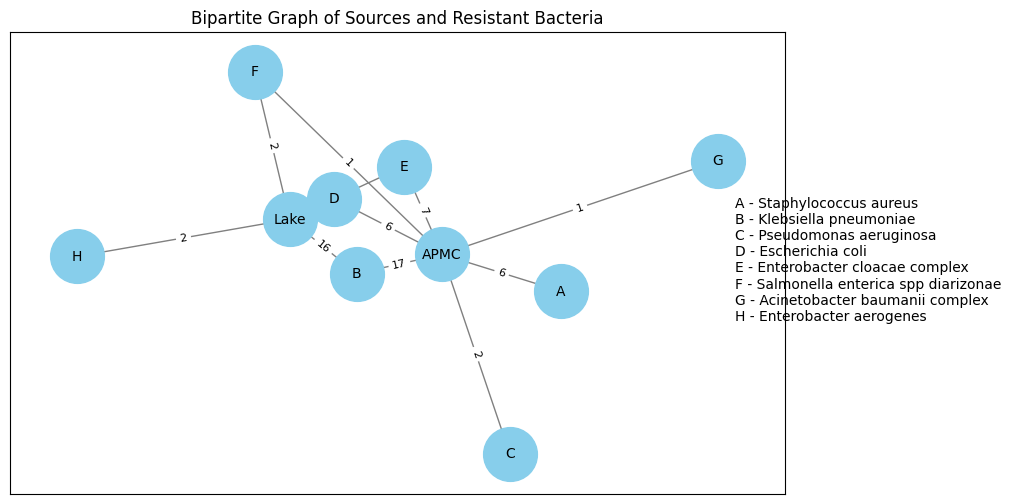

In [ ]:
# Initialize bipartite graph
G = nx.Graph()

# Standardize Klebsiella pneumoniae names
df["Organism"] = df["Organism"].replace({
    "Klebsiella pneumoniae spp pneumoniae": "Klebsiella pneumoniae",
    "Klibsiella pneumoniae ssp pneumoniae": "Klebsiella pneumoniae",
    "Klebsiella pneumoniae ssp pneumoniae": "Klebsiella pneumoniae"
})

# Define the correct order based on ESKAPE and VESS
bacteria_order = [
    "Enterococcus faecium", "Staphylococcus aureus", "Klebsiella pneumoniae",
    "Acinetobacter baumanii", "Pseudomonas aeruginosa", "Enterobacter spp.",
    "Vibrio cholerae", "Escherichia coli", "Shigella spp", "Salmonella spp"
]

# Assign unique letters to bacteria AFTER sorting
bacteria = df["Organism"].unique()
bacteria_sorted = sorted(bacteria, key=lambda x: bacteria_order.index(x) if x in bacteria_order else float("inf"))
bacteria_labels = {bacteria_sorted[i]: chr(65 + i) for i in range(len(bacteria_sorted))}

# Group by "Organism" and list sources that contain them
grouped = df.groupby("Organism")["Source"].apply(list)

# Add nodes and edges
for org, sources in grouped.items():
    org_label = bacteria_labels[org]  # Use letter instead of full name
    G.add_node(org_label, bipartite=1)  # Bacteria as one node type

    for src in sources:
        G.add_node(src, bipartite=0)  # Source as another node type
        if G.has_edge(src, org_label):
            G[src][org_label]['weight'] += 1  # Increment weight if already connected
        else:
            G.add_edge(src, org_label, weight=1)  # New connection

# Draw the network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Compute layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=8)

# Create legend labels from the **sorted** bacteria list
legend_labels = [f"{bacteria_labels[b]} - {b}" for b in bacteria_sorted]
legend_text = "\n".join(legend_labels)

# Add legend outside the plot
plt.gcf().text(0.85, 0.5, legend_text, fontsize=10, verticalalignment="center")

plt.title("Bipartite Graph of Sources and Resistant Bacteria")
plt.show()
